# King County Housing Data – Exploratory Data Analysis (EDA)

This notebook explores the King County Housing dataset.  
The goal is to understand the data, find patterns, validate hypotheses, and provide insights and recommendations for a client.

We will follow the EDA checklist:

1. Understanding  
2. Hypothesis  
3. Explore  
4. Clean  
5. Relationships  
6. Back to the Hypothesis  
7. Fine Tune  
8. Explain  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings (optional, simple)
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [2]:
# run this to read the data, do not modify overwriting!
sales = pd.read_csv("data/king_county_house_sales_202512091732.csv")
details = pd.read_csv("data/king_county_house_details_202512091731.csv")

sales.head(), details.head()


(         date     price    house_id  id
 0  2014-10-13  221900.0  7129300520   1
 1  2014-12-09  538000.0  6414100192   2
 2  2015-02-25  180000.0  5631500400   3
 3  2014-12-09  604000.0  2487200875   4
 4  2015-02-18  510000.0  1954400510   5,
            id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
 0     1000102       6.0        3.0       2400.0    9373.0     2.0         NaN   
 1   100100050       3.0        1.0       1320.0   11090.0     1.0         0.0   
 2  1001200035       3.0        1.0       1350.0    7973.0     1.5         NaN   
 3  1001200050       4.0        1.5       1260.0    7248.0     1.5         NaN   
 4  1003000175       3.0        1.0        980.0    7606.0     1.0         0.0   
 
    view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
 0   0.0          3      7      2400.0            0.0      1991           0.0   
 1   0.0          3      7      1320.0            0.0      1955           0.0   
 2   0.0        

## 1. Understanding the Data

We check the structure, column names, and data types.


In [3]:
sales.info()
details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      21597 non-null  object 
 1   price     21597 non-null  float64
 2   house_id  21597 non-null  int64  
 3   id        21597 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 675.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 

## 2. Hypotheses

Before exploring the data, here are some assumptions:

1. Houses closer to the water are more expensive.
2. Houses with more bedrooms and bathrooms have higher prices.
3. Some ZIP codes might form “rich neighborhoods”.
4. Newer, renovated houses should have higher prices.

These will be tested during EDA.


## 3. Explore the Data

We look for:
- Missing values  
- Outliers  
- Strange values  
- Distribution of key columns  


In [4]:
sales.isna().sum(), details.isna().sum()


(date        0
 price       0
 house_id    0
 id          0
 dtype: int64,
 id                  0
 bedrooms            0
 bathrooms           0
 sqft_living         0
 sqft_lot            0
 floors              0
 waterfront       2360
 view               63
 condition           0
 grade               0
 sqft_above          0
 sqft_basement     451
 yr_built            0
 yr_renovated     3811
 zipcode             0
 lat                 0
 long                0
 sqft_living15       0
 sqft_lot15          0
 dtype: int64)

In [5]:
sales.describe()


,price,house_id,id
count,2.159700e+04,2.159700e+04,21597.000000
mean,5.402966e+05,4.580474e+09,10799.000000
std,3.673681e+05,2.876736e+09,6234.661218
min,7.800000e+04,1.000102e+06,1.000000
25%,3.220000e+05,2.123049e+09,5400.000000
50%,4.500000e+05,3.904930e+09,10799.000000
75%,6.450000e+05,7.308900e+09,16198.000000
max,7.700000e+06,9.900000e+09,21597.000000


In [6]:
df = sales.merge(details, on="id", how="left")
df.head()


,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-09,538000.0,6414100192,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-25,180000.0,5631500400,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-09,604000.0,2487200875,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-18,510000.0,1954400510,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

# count columns before and after merge
print(sales.shape, details.shape, df.shape)

# now we need to check if we have big delta in number of rows
# (e.g. doubling → indication of duplicates in details)

(21597, 4) (21420, 19) (21597, 22)


# sales.shape   -> (21597, 4) -> colums 
# details.shape -> (21420, 19)
# df.shape      -> (21597, 22) -> colums same = 21597, row 4+19-1=22 

In [ ]:
# IDs without match
ids_sales = set(sales['id'])
ids_details = set(details['id'])
ids_unmatched = ids_sales - ids_details

print(f"Unmatched IDs (sales but not in details): {len(ids_unmatched)}")

Unmatched IDs (sales but not in details): 21597


In [11]:
df_inner = sales.merge(details, on="id", how="inner")
print("Inner join shape:", df_inner.shape)

loss_rate = 1 - len(df_inner) / len(sales)
print(f"Rows lost with inner join (sales not matched): {loss_rate:.2%}")

Inner join shape: (0, 22)
Rows lost with inner join (sales not matched): 100.00%


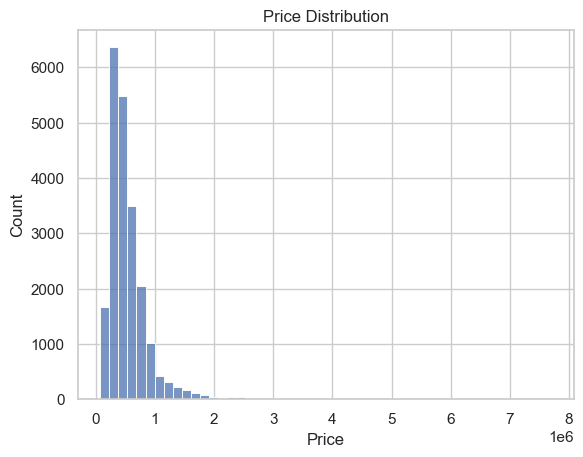

In [10]:
sns.histplot(df["price"], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

## 4. Cleaning the Data

We check:
- Incorrect values  
- Missing values  
- Outliers  
- Whether we need to transform variables (log, categories, etc.)


In [ ]:
sns.boxplot(x=df["price"])
plt.title("Price Outliers")
plt.xlabel("Price")
plt.show()


## 5. Relationships

We explore correlations between variables.


In [ ]:
plt.figure(figsize=(12,8))
# Select numeric columns to avoid errors
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()


## 6. Back to the Hypotheses

We check if our assumptions are true or not and update them if necessary.


In [ ]:
sns.scatterplot(data=df, x="sqft_living", y="price")
plt.title("Living Area vs Price")
plt.xlabel("Square Feet Living")
plt.ylabel("Price")
plt.show()


## 7. Fine Tune

Remove unnecessary plots, make visuals clear, add labels, and prepare clean results for the client.


## 8. Explain – Insights & Recommendations

### Insights (at least 3)
- Insight 1  
- Insight 2  
- Insight 3  

### Geographic Insight
- ZIP code or location-based finding  

### Recommendations (at least 3)
- Rec 1  
- Rec 2  
- Rec 3  

Client chosen: **(your choice)**
